In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Explain Dataset

In [135]:
#I share the link with my google drive and use:)
import pandas as pd
TrainSet=pd.read_csv('/content/drive/My Drive/YAP/data.csv')
TestSet=pd.read_csv('/content/drive/My Drive/YAP/test.csv')
TestSet.shape

(154165, 19)

In [136]:
TrainSet.head()

,Unnamed: 0,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,1,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,2,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,3,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,4,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125
4,5,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [137]:
TrainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616656 entries, 0 to 616655
Data columns (total 20 columns):
Unnamed: 0                                616656 non-null int64
Episode                                   616656 non-null object
Station                                   616656 non-null object
Channel Type                              616656 non-null object
Season                                    616656 non-null object
Year                                      616656 non-null int64
Date                                      616656 non-null object
Day of week                               616656 non-null object
Start_time                                616613 non-null object
End_time                                  616613 non-null object
Length                                    616656 non-null int64
Name of show                              616656 non-null object
Name of episode                           394077 non-null object
Genre                                     61665

In [138]:
CountOfObj=[]
for objects in range(20):#Num Of Features 
  CountOfObj.append([
                     len(TrainSet[TrainSet.columns[objects]].unique())
                     ])
pd.DataFrame(CountOfObj,columns=["Unique Count Of Obj"],index=TrainSet.columns)


,Unique Count Of Obj
Unnamed: 0,616656
Episode,6687
Station,24
Channel Type,2
Season,4
Year,4
Date,877
Day of week,7
Start_time,138322
End_time,138334


##Do Numeric Dataset

In [139]:
#--------------------------Take DataSet in Numeric Shape-----------------------------
#------------------------------------TrainSet----------------------------------------
TrainSet["Season"] = pd.get_dummies(TrainSet["Season"])
TrainSet["First time or rerun"] = pd.get_dummies(TrainSet["First time or rerun"])
TrainSet["# of episode in the season"] = pd.get_dummies(TrainSet["# of episode in the season"])
TrainSet["Game of the Canadiens during episode?"] = pd.get_dummies(TrainSet["Game of the Canadiens during episode?"])
TrainSet["Movie?"] = pd.get_dummies(TrainSet["Movie?"])
TrainSet["Station"] = pd.get_dummies(TrainSet["Station"])
TrainSet["Genre"] = pd.get_dummies(TrainSet["Genre"])
TrainSet["Day of week"] = pd.get_dummies(TrainSet["Day of week"])
TrainSet['Channel Type'] = pd.get_dummies(TrainSet['Channel Type'])
TrainSet["Date"] = TrainSet["Date"].astype("datetime64[ns]")
TrainSet["Start_time"] = TrainSet["Start_time"].astype("datetime64[ns]")
TrainSet["End_time"] = TrainSet["End_time"].astype("datetime64[ns]")
TrainSet.head()
#------------------------------------TestSet----------------------------------------
TestSet["Season"] = pd.get_dummies(TestSet["Season"])
TestSet["First time or rerun"] = pd.get_dummies(TestSet["First time or rerun"])
TestSet["# of episode in the season"] = pd.get_dummies(TestSet["# of episode in the season"])
TestSet["Temperature in Montreal during episode"] = pd.get_dummies(TestSet["Temperature in Montreal during episode"])
TestSet["Movie?"] = pd.get_dummies(TestSet["Movie?"])
TestSet["Game of the Canadiens during episode?"] = pd.get_dummies(TestSet["Game of the Canadiens during episode?"])
TestSet["Station"] = pd.get_dummies(TestSet["Station"])
TestSet["Genre"] = pd.get_dummies(TestSet["Genre"])
TestSet["Day of week"] = pd.get_dummies(TestSet["Day of week"])
TestSet['Channel Type'] = pd.get_dummies(TestSet['Channel Type'])
TestSet["Date"] = TestSet["Date"].astype("datetime64[ns]")
TestSet["Start_time"] = TestSet["Start_time"].astype("datetime64[ns]")
TestSet["End_time"] = TestSet["End_time"].astype("datetime64[ns]")
TestSet.head()
#"Station","Channel Type","Day of week","Season","	Length","Genre","First time or rerun","Movie?","Game of the Canadiens during episode?","Temperature in Montreal during episode"

,Unnamed: 0,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Temperature in Montreal during episode
0,1,Mom V.F. (M),0,0,0,2019,2019-01-22,0,2019-01-22 11:30:00,2019-01-22 12:00:00,2,Mom V.F. (M),Abstinence,0,1,0,1,1,0
1,2,2 filles fauchées,0,0,0,2019,2019-01-22,0,2019-01-22 12:00:00,2019-01-22 12:30:00,2,2 filles fauchées,Et la rupture,0,1,0,1,1,0
2,3,The Big Bang Theory,0,0,0,2019,2019-01-22,0,2019-01-22 12:30:00,2019-01-22 13:00:00,2,The Big Bang Theory,La désintégration de la sonde spatiale,0,1,0,1,1,0
3,4,Flashpoint,0,0,0,2019,2019-01-22,0,2019-01-22 13:00:00,2019-01-22 14:00:00,4,Flashpoint,Retraite impossible (P),0,0,0,1,1,0
4,5,Les Frères Scott,0,0,0,2019,2019-01-22,0,2019-01-22 14:00:00,2019-01-22 15:00:00,4,Les Frères Scott,Premières désillusions,0,1,0,1,1,0


##Plot Some Features With Together

With plotting correlation between features i Relatively can find good feature:)

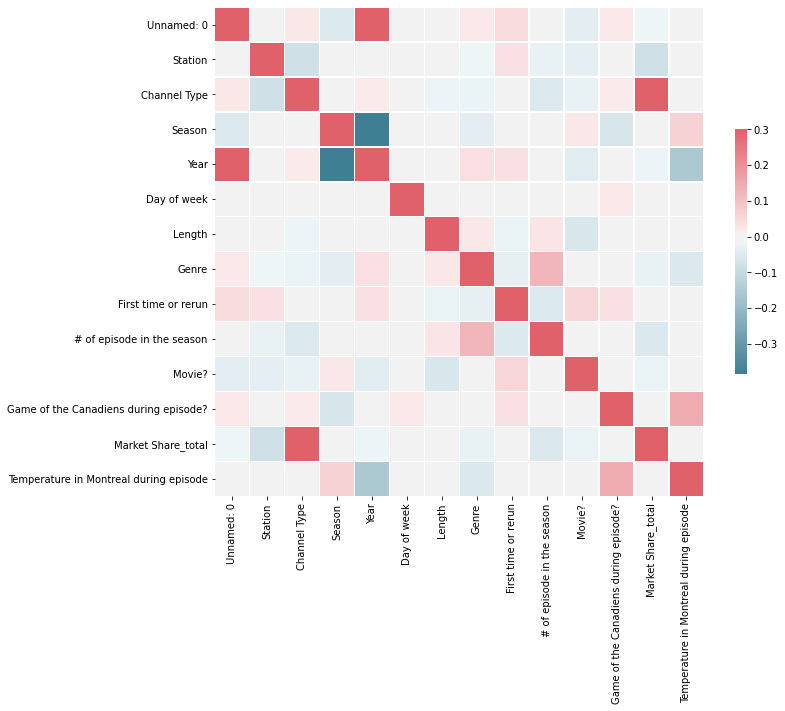

In [140]:
#------------------let's create a correlation matrix----------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr = TrainSet.corr() 
plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

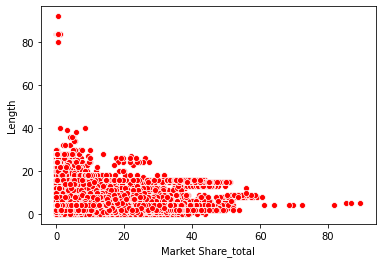

In [141]:
import seaborn as sns
columns=TrainSet.columns
sns.scatterplot(x=columns[18],y=columns[10],data=TrainSet,color="red")

In [142]:
columns[10]

'Length'

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


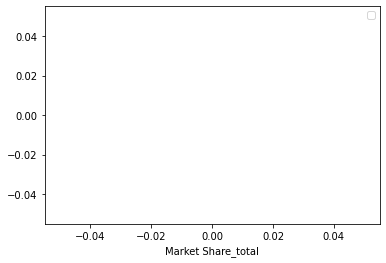

In [143]:
Seasons=['Fall','Winter','Spring','Summer']
for season in Seasons:
  sns.distplot(TrainSet[TrainSet['Season']==season]['Market Share_total'],
               label=season,hist=False)
  plt.legend()


We See That The Effect In Summer On Market Is More Than Other Seasons:)

In [144]:
TrainSet.groupby(['Year'])['Market Share_total'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2016,75849.0,3.108839,5.049589,0.0,0.5,1.5,3.4,56.0
2017,255214.0,3.114138,4.950458,0.0,0.5,1.4,3.5,85.4
2018,260132.0,2.894652,4.854561,0.0,0.4,1.3,3.2,86.6
2019,25461.0,2.888021,4.846557,0.0,0.4,1.3,3.2,89.5


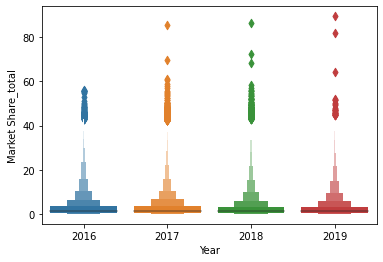

In [145]:
sns.boxenplot(x="Year",y="Market Share_total",data=TrainSet)

The Data in 2019 Has More Outliers Than Others

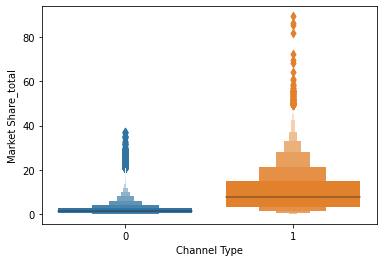

In [146]:
sns.boxenplot(x="Channel Type",y="Market Share_total",data=TrainSet)

We See That The Effect On Market By "Specialty Channel" Is More Than "General" Mode:)

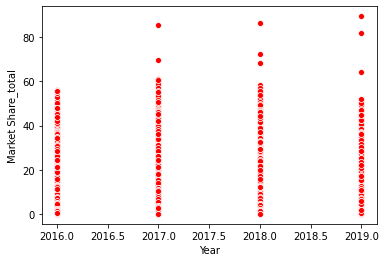

In [147]:
import seaborn as sns
columns=TrainSet.columns
#sns.set_style('whitegrid')
sns.scatterplot(x=columns[5],y=columns[18],data=TrainSet,color="red")

Nothing!

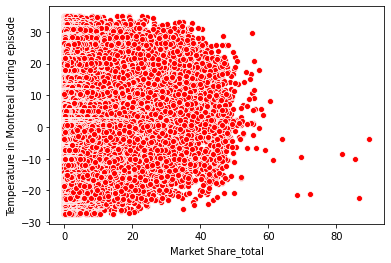

In [148]:
import seaborn as sns
columns=TrainSet.columns
#sns.set_style('whitegrid')
sns.scatterplot(x=columns[18],y=columns[19],data=TrainSet,color="red")

This Two Have Acceptable Relation!

Because Of Having Lenght,I Don't Need to Start_time and End_time:

## Drop Unnecessary Features

In [149]:
#1-----------------------------First Result-------------------------------------------
TrainSet['Episode'].equals(TrainSet['Name of show'])
#This Two Columns Are Same!
#-----------------------------So I Drop One of Them:)----------------------------------
TrainSet=TrainSet.drop(['Name of show','Unnamed: 0'], axis=1)
TestSet=TestSet.drop(['Name of show','Unnamed: 0'], axis=1)
#----by taking correlation between data,i try to drop the columns by low corr:)-------
#-----------by doing this i solve Nan problem with data-------------------------------
TrainSet.drop(['Episode','Year', 'Date','Name of episode','Start_time','End_time',], axis = 1, inplace = True) 
TrainSet.head()
TestSet.drop(['Episode','Year', 'Date','Name of episode','Start_time','End_time',], axis = 1, inplace = True) 
TestSet.head()

,Station,Channel Type,Season,Day of week,Length,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Temperature in Montreal during episode
0,0,0,0,0,2,0,1,0,1,1,0
1,0,0,0,0,2,0,1,0,1,1,0
2,0,0,0,0,2,0,1,0,1,1,0
3,0,0,0,0,4,0,0,0,1,1,0
4,0,0,0,0,4,0,1,0,1,1,0


##Test Train Split

In [150]:
#--------------------------------------Make X,y Data------------------------------
#----------------------------------------TrainSet---------------------------------
XTrainData=TrainSet[TrainSet.columns[:-1]]
YTrainLable=TrainSet["Market Share_total"]
YTrainLable

0         0.9
1         0.5
2         0.3
3         1.7
4         2.2
         ... 
616651    0.0
616652    1.1
616653    0.3
616654    0.4
616655    1.6
Name: Market Share_total, Length: 616656, dtype: float64

In [151]:
#---------------------------TestTrainSplit For TrainSet-----------------------------
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(XTrainData,YTrainLable, test_size = 0.3, random_state=123)
XTrain.shape

(431659, 11)

##LinearRegression

In [152]:
from sklearn.linear_model import LinearRegression 
Reg= LinearRegression()
Reg.fit(XTrain,YTrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
from sklearn.metrics import r2_score
Pred=Reg.predict(XTest)
r2_score(YTest,Pred)

1.0

##AdaBoost

In [154]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
AB=AdaBoostRegressor( DecisionTreeRegressor(max_depth=100))
AB.fit(XTrain,YTrain)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=100,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                

In [155]:
from sklearn.metrics import r2_score
Pred=AB.predict(XTest)
r2_score(YTest,Pred)

0.9999994700760784

##DecisionTree

In [0]:
from sklearn.tree import DecisionTreeRegressor
DT= DecisionTreeRegressor(max_depth =50)

In [157]:
DT.fit(XTrain,YTrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [158]:
from sklearn.metrics import r2_score
Pred=DT.predict(XTest)
r2_score(YTest,Pred)

0.99999944025352

##CrossValidation

In [159]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np
CrossScore = cross_val_score(DT, XTrain , YTrain, cv=20,scoring='r2')
print("Mean:",(np.mean(CrossScore)))
print("Std:",(np.std(CrossScore)))

Mean: 0.999993470075958
Std: 1.1012970730754567e-05


I Have Just Little Bit Differ In Accuracy By Using Cross!

##RandomForest

In [160]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=10)
RF.fit(XTrain,YTrain)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [161]:
from sklearn.metrics import r2_score
Pred=RF.predict(XTest)
r2_score(YTest,Pred)

0.999999244984584

##Predict On Test Set

So I Explain Some Considered Models,Lets Predict On TestSet

In [162]:
#--------------------------------Make X,y Data----------------------------------
#----------------------------------TestSet---------------------------------------
XTestData=TestSet[TestSet.columns[:]]
XTestData

,Station,Channel Type,Season,Day of week,Length,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Temperature in Montreal during episode
0,0,0,0,0,2,0,1,0,1,1,0
1,0,0,0,0,2,0,1,0,1,1,0
2,0,0,0,0,2,0,1,0,1,1,0
3,0,0,0,0,4,0,0,0,1,1,0
4,0,0,0,0,4,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
154160,1,0,0,0,4,0,1,0,1,1,0
154161,1,0,0,0,4,0,1,0,1,1,0
154162,1,0,0,0,6,0,1,0,0,1,0
154163,1,0,0,0,10,0,1,0,0,1,0


In [0]:
#---------------------------------AdaBoost--------------------------------------
ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth=200))
ABR.fit(XTrain,YTrain)
TestPredAda = ABR.predict(XTestData)
#-------------------------------LinearRegression--------------------------------
Reg= LinearRegression()
Reg.fit(XTrain,YTrain)
TestPred=Reg.predict(XTestData)
#---------------------------------RandomForest-----------------------------------
RF=RandomForestRegressor(n_estimators=10)
RF.fit(XTrain,YTrain)
TestPredRF=RF.predict(XTestData)
#--------------------------------DecisionTree-----------------------------------
DT= DecisionTreeRegressor(max_depth =50)
DT.fit(XTrain,YTrain)
TestPredDT=DT.predict(XTestData)